<a href="https://colab.research.google.com/github/AndroGari/AndroGari/blob/master/ivy_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q ivy
!pip install -q dm-haiku kornia timm pyvis

In [2]:
import ivy

In [3]:
ivy.set_backend("torch")

<module 'ivy.functional.backends.torch' from '/usr/local/lib/python3.10/dist-packages/ivy/functional/backends/torch/__init__.py'>

In [4]:
x=ivy.array([1,2,3])
print(type(x))

<class 'ivy.data_classes.array.array.Array'>


In [5]:
x=ivy.native_array([1,2,3])
print(type(x))

<class 'torch.Tensor'>


In [6]:
ivy.set_backend("jax")
x1, x2=ivy.array([[1],[2],[3]]), ivy.array([[1, 2, 3]])
output=ivy.matmul(x1,x2)
print(type(output.to_native()))

/usr/local/lib/python3.10/dist-packages/ivy/utils/exceptions.py:383: UserWarning: The current backend: 'jax' does not support inplace updates natively. Ivy would quietly create new arrays when using inplace updates with this backend, leading to memory overhead (same applies for views). If you want to control your memory management, consider doing ivy.set_inplace_mode('strict') which should raise an error whenever an inplace update is attempted with this backend.
  warnings.warn(


<class 'jaxlib.xla_extension.ArrayImpl'>


In [7]:
ivy.set_backend("tensorflow")
x1, x2=ivy.array([[1],[2],[3]]), ivy.array([[1, 2, 3]])
output=ivy.matmul(x1,x2)
print(type(output.to_native()))

<class 'tensorflow.python.framework.ops.EagerTensor'>


/usr/local/lib/python3.10/dist-packages/ivy/utils/exceptions.py:383: UserWarning: The current backend: 'tensorflow' does not support inplace updates natively. Ivy would quietly create new arrays when using inplace updates with this backend, leading to memory overhead (same applies for views). If you want to control your memory management, consider doing ivy.set_inplace_mode('strict') which should raise an error whenever an inplace update is attempted with this backend.
  warnings.warn(


In [8]:
ivy.set_backend("torch")
x1, x2=ivy.array([[1],[2],[3]]), ivy.array([[1, 2, 3]])
output=ivy.matmul(x1,x2)
print(type(output.to_native()))

<class 'torch.Tensor'>


In [9]:
def sigmoid(z):
  return ivy.divide(1, (1+ivy.exp(-z)))

In [10]:
ivy.set_backend("torch")
x1=ivy.array([[1], [2], [3]])
print(sigmoid(x1))

ivy.set_backend("jax")
x1=ivy.array([[1], [2], [3]])
print(sigmoid(x1))

ivy.array([[0.7310586 ],
       [0.88079703],
       [0.95257413]])
ivy.array([[0.7310586 ],
       [0.88079703],
       [0.95257413]])


In [11]:
class Regressor(ivy.Module):
  def __init__(self, input_dim, output_dim):
    self.linear0=ivy.Linear(input_dim, 128)
    self.linear1=ivy.Linear(128, output_dim)
    ivy.Module.__init__(self)
  def _forward(self, x):
    x=self.linear0(x)
    x=ivy.functional.relu(x)
    x=self.linear1(x)
    return x

In [12]:
ivy.set_backend("torch")
model=Regressor(input_dim=1, output_dim=1)
optimizer=ivy.Adam(0.1)

In [13]:
n_training_examples=2000
noise=ivy.random.random_normal(shape=(n_training_examples, 1), mean=0, std=0.1)
x=ivy.linspace(-6, 3, n_training_examples).reshape((n_training_examples, 1))
y=0.2*x**2+0.5*x+0.1+noise

In [14]:
def loss_fun(pred, target):
  return ivy.mean((pred-target)**2)
for epoch in range(20):
  pred=model(x)
  loss, grads=ivy.execute_with_gradients(lambda v:loss_fun(pred, y), model.v)
  model.v=optimizer.step(model.v, grads)
  print(f"Epoch:{epoch+1:2d} --- Loss:{ivy.to_numpy(loss).item():.6f}")
print("Finished Training!")

Epoch: 1 --- Loss:4.731874
Epoch: 2 --- Loss:1.009381
Epoch: 3 --- Loss:0.665855
Epoch: 4 --- Loss:1.515712
Epoch: 5 --- Loss:2.646985
Epoch: 6 --- Loss:3.463670
Epoch: 7 --- Loss:3.726255
Epoch: 8 --- Loss:3.401359
Epoch: 9 --- Loss:2.671393
Epoch:10 --- Loss:1.790908
Epoch:11 --- Loss:1.027707
Epoch:12 --- Loss:0.609682
Epoch:13 --- Loss:0.593450
Epoch:14 --- Loss:0.853995
Epoch:15 --- Loss:1.052623
Epoch:16 --- Loss:0.981486
Epoch:17 --- Loss:0.740247
Epoch:18 --- Loss:0.545431
Epoch:19 --- Loss:0.537298
Epoch:20 --- Loss:0.660350
Finished Training!


In [15]:
def normalize(x):
  mean=ivy.mean(x)
  std=ivy.std(x)
  return ivy.divide(ivy.subtract(x, mean), std)

In [16]:
import torch
x0 = torch.tensor([1., 2., 3.])
normalize_traced = ivy.trace_graph(normalize, to="torch", args=(x0,))

In [17]:
import time

In [18]:
from tqdm import tqdm
%time
normalize(x0)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


ivy.array([-1.2247448,  0.       ,  1.2247448])

In [19]:
from IPython.display import HTML
normalize_traced.show(fname="graph.html", notebook=True)
HTML(filename="graph.html")

graph.html


In [20]:
%time
normalize_traced(x0)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


tensor([-1.2247,  0.0000,  1.2247])

In [21]:
normalize_native_comp = ivy.trace_graph(normalize, backend_compile=True, to="torch", args=(x0,))

In [22]:
%time
normalize_native_comp(x0)

CPU times: user 43 µs, sys: 3 µs, total: 46 µs
Wall time: 52 µs


tensor([-1.2247e+00, -7.3000e-08,  1.2247e+00])

In [23]:
import torch
x1=torch.tensor([1., 2., 3.])
eager_graph = ivy.trace_graph(normalize, to="torch", args=(x1,))

ret = eager_graph(x1)

In [24]:
lazy_graph = ivy.trace_graph(normalize, to="torch")

ret = lazy_graph(x1)

ret = lazy_graph(x1)

In [25]:
def normalize(x):
    mean = torch.mean(x)
    std = torch.std(x)
    return torch.div(torch.sub(x, mean), std)

jax_normalize = ivy.transpile(normalize, source="torch", to="jax")

In [26]:
import jax
key = jax.random.PRNGKey(42)
jax.config.update('jax_enable_x64', True)
x = jax.random.uniform(key, shape=(10,))

jax_out = jax_normalize(x)
print(jax_out, type(jax_out))

[-0.93968587  0.26075466 -0.22723222 -1.06276492 -0.47426987  1.72835908
  1.71737559 -0.50411096 -0.65419174  0.15576624] <class 'jaxlib.xla_extension.ArrayImpl'>


In [27]:
!pip install kornia

In [28]:
import kornia
import requests
import jax.numpy as jnp
import numpy as np
from PIL import Image

In [29]:
import ivy
import torch
import numpy as np
import tensorflow as tf
tf.keras.utils.set_random_seed(0)
torch.manual_seed(0)

In [30]:
jax_kornia = ivy.transpile(kornia, source="torch", to="jax")

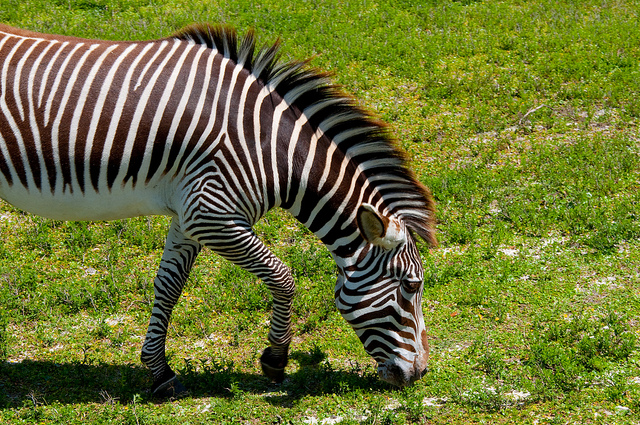

In [31]:
url = "http://images.cocodataset.org/train2017/000000000034.jpg"
raw_img = Image.open(requests.get(url, stream=True).raw)
img = jnp.transpose(jnp.array(raw_img), (2, 0, 1))
img = jnp.expand_dims(img, 0) / 255
display(raw_img)

In [32]:
img=torch.from_numpy(np.asarray(img))
out = kornia.enhance.sharpness(img, 10)
type(out)

torch.Tensor

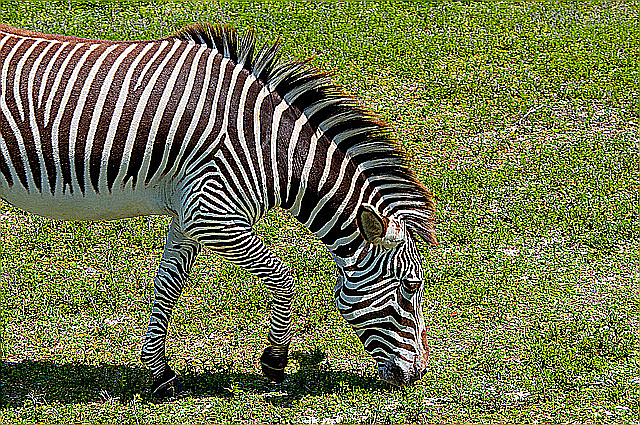

In [33]:
np_image = np.uint8(np.array(out[0])*255)
display(Image.fromarray(np.transpose(np_image, (1, 2, 0))))

In [34]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [35]:
input_array = tf.random.normal((1, 28, 28, 3))
torch_model = ivy.transpile(model, source = "tensorflow", to="torch", args=(input_array,))

/usr/local/lib/python3.10/dist-packages/ivy/compiler/compiler.py:163: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return _transpile(
/usr/local/lib/python3.10/dist-packages/ivy/compiler/compiler.py:163: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return _transpile(


In [36]:
type(torch_model)

III.__TorchModule

In [37]:
isinstance(torch_model, torch.nn.Module)

True